<font size =5>**為何選擇此題目**</font>
 
 選擇這個題目的原因是因為這個與當初上課的題目非常類似，加上之前沒有太多接觸機器學習的經驗
 
 ，所以打算先從較簡單的題目來更了解機器學習中建立預測模型的流程，以及更加熟悉numpy、pandas等操作

<font size =5>**目標介紹**</font>

通過訓練集以及測試集中的資料來預測測試集裡的人有沒有被傳送到異次元空間

<font size =5>**匯入模塊**</font>

In [71]:

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

<font size =5>**將數據完整顯示**</font>

In [72]:
pd.set_option('display.expand_frame_repr', False)

<font size =5>**匯入以及觀察訓練集**</font>

In [73]:
train_data = pd.read_csv("spaceship-titanic/train.csv")
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


<font size =5>**分析數據中的各項特徵**</font>

1.PassengerId:每個乘客的唯一ID，其形式採用xxxx_yy，由於ID只是編號 (該特徵丟棄)

2.HomePlanet:乘客搭上飛船前所居住的行星 (可能有關聯，該特徵保留)

3.CryoSleep:乘客在航行期間是處於冷凍睡眠狀態 (可能有關聯，該特徵保留)

4.Cabin:乘客所屬船艙 (可能有關聯，該特徵保留)

5.Destination:乘客要抵達的目的地 (可能有關聯，該特徵保留)

6.Age:乘客年齡 (可能有關聯，該特徵保留)

7.VIP -- 旅客在航行期間是否支付了特殊VIP服務費用。 (可能有關聯，該特徵保留)

8.RoomService -- 乘客在泰坦尼克號宇宙飛船所花費的其中一項。 (可能有關聯，該特徵保留)

9.FoodCourt -- 乘客在泰坦尼克號宇宙飛船所花費的其中一項。 （可能有關聯，該特徵保留。）

10.ShoppingMall -- 乘客在泰坦尼克號宇宙飛船所花費的其中一項。 （可能有關聯，該特徵保留。）

11.Spa -- 乘客在泰坦尼克號宇宙飛船所花費的其中一項。 （可能有關聯，該特徵保留。）

12.VRDeck -- 乘客在泰坦尼克號宇宙飛船所花費的其中一項。 （可能有關聯，該特徵保留。）

13.Name -- 乘客的名字和姓氏。 （該特徵丟棄）

14.Transported -- 乘客是否被運送到另一個維度。這是目標，我們嘗試預測的列

In [74]:
#刪除我們丟棄的特徵
train_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
train_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


由於訓練集中有數據缺失，所以我們需要統計數據中的缺失量

pandas.isna:用於檢測缺失值。它返回一個布爾值相同大小的對象，指示值是否為NA

pandas.sum:檢測每列中缺失值的數量

pandas.sort_values:將數據進行排序


In [75]:
train_data.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

In [76]:
#檢測缺失數據是否超過一半
train_data.isna().sum()>(len(train_data)/2)


HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
Transported     False
dtype: bool

接下來我們需要探索測試集中的數據，其步驟與訓練及一樣

In [77]:
test_data = pd.read_csv("spaceship-titanic/test.csv")
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [78]:
#刪除不需要的特徵
test_data.drop(['PassengerId', 'Name'], axis=1, inplace=True)
test_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [79]:
#統計缺失值
test_data.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
dtype: int64

接著合併訓練集與測試集，將合併的資料一同進行預處理

In [80]:
all_data = pd.concat((train_data, test_data)).reset_index(drop=True)
all_data.shape

(12970, 12)

In [81]:
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [82]:
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
CryoSleep        310
ShoppingMall     306
Cabin            299
VIP              296
FoodCourt        289
HomePlanet       288
Spa              284
Destination      274
Age              270
VRDeck           268
RoomService      263
dtype: int64

處理合併後數據特徵的缺失值

<font size=5 >**HomePlanet特徵**</font>

In [83]:
all_data['HomePlanet'].value_counts(dropna=False)

HomePlanet
Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: count, dtype: int64

由於總計12970筆資料，相對來說缺失值佔少數，所以我們用眾數填充的方式來填補缺失值

In [84]:
all_data['HomePlanet'] = all_data['HomePlanet'].fillna('Earth')
all_data.HomePlanet.value_counts(dropna=False)

HomePlanet
Earth     7153
Europa    3133
Mars      2684
Name: count, dtype: int64

<font size=5 >**CryoSleep特徵**</font>

In [85]:
all_data.CryoSleep.value_counts(dropna=False)

CryoSleep
False    8079
True     4581
NaN       310
Name: count, dtype: int64

CryoSleep特徵的缺失值也同樣採用眾數填充

In [86]:
all_data['CryoSleep'] = all_data['CryoSleep'].fillna('False')
all_data.CryoSleep.value_counts(dropna=False)

CryoSleep
False    8079
True     4581
False     310
Name: count, dtype: int64

<font size =5 >**Cabin特徵(由於Cabin是由三行獨立特徵組成，所以我們將Cabin拆成3種特徵)**</font>


In [87]:
all_data = pd.concat([all_data, all_data['Cabin'].str.split('/', expand=True)], axis=1)
all_data.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [88]:
#刪除Cabin特徵
all_data.drop('Cabin', axis=1, inplace=True)
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,0,1,2
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


In [89]:
#重新命名拆芬過的欄位
all_data.rename(columns={0: 'Deck', 1: 'Num', 2: 'Side'}, inplace=True)

In [90]:
all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S


<font size=5 >**Deck特徵**</font>

In [91]:
all_data.Deck.value_counts(dropna=False)

Deck
F      4239
G      3781
E      1323
B      1141
C      1102
D       720
A       354
NaN     299
T        11
Name: count, dtype: int64

使用眾數填充方式

In [92]:
all_data['Deck'] = all_data['Deck'].fillna('F')
all_data.Deck.value_counts(dropna=False)

Deck
F    4538
G    3781
E    1323
B    1141
C    1102
D     720
A     354
T      11
Name: count, dtype: int64

<font size = 5 >**Num特徵**</font>


In [93]:
all_data.Num.value_counts(dropna=False)

Num
NaN     299
82       34
56       28
4        28
31       27
       ... 
1848      1
1847      1
1846      1
1844      1
1890      1
Name: count, Length: 1895, dtype: int64

透過統計後發現Num特徵空值太多且其數字看不出其意義，所以將Num特徵移除

In [94]:
all_data.drop('Num', axis=1, inplace=True)

Side特徵

In [95]:
all_data.Side.value_counts(dropna=False)

Side
S      6381
P      6290
NaN     299
Name: count, dtype: int64

由於S與P兩者相近所以我們以隨機方式填充

In [96]:
all_data['Side'] = all_data['Side'].fillna(method='ffill')
all_data.Side.value_counts(dropna=False)

Side
S    6524
P    6446
Name: count, dtype: int64

<font size=5 >**Destination特徵**</font>

In [97]:
all_data.Destination.value_counts(dropna=False)

Destination
TRAPPIST-1e      8871
55 Cancri e      2641
PSO J318.5-22    1184
NaN               274
Name: count, dtype: int64

In [98]:
# 利用眾數填充方式
all_data['Destination'] = all_data['Destination'].fillna('TRAPPIST-1e')
all_data.Destination.value_counts(dropna=False)

Destination
TRAPPIST-1e      9145
55 Cancri e      2641
PSO J318.5-22    1184
Name: count, dtype: int64

<font size=5 >**Age特徵**</font>

<Axes: ylabel='Density'>

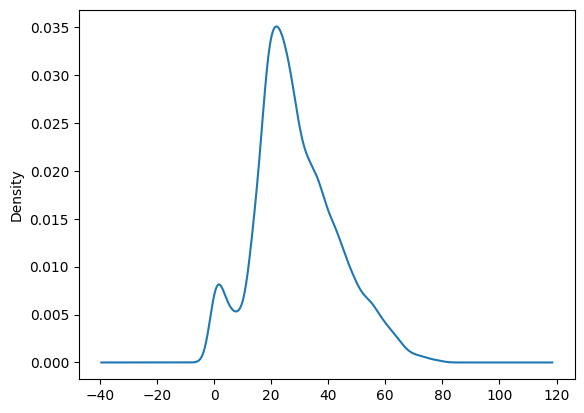

In [99]:
all_data['Age'].plot.density()

<Axes: ylabel='Density'>

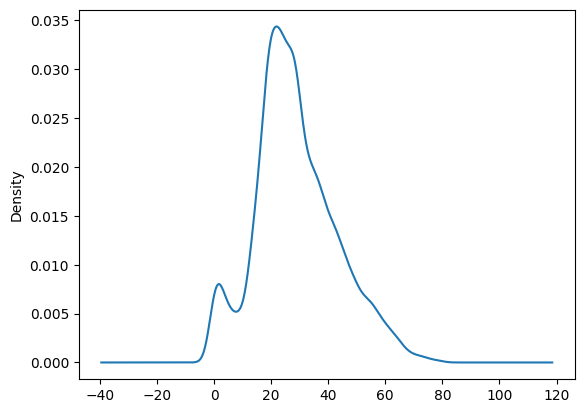

In [100]:
#由於年齡分布相對平均由於年齡分布相對平均，所以我們使用均值填充方式
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].mean())
all_data['Age'].plot.density()

<font size =5>**VIP特徵**</font>

In [101]:
all_data.VIP.value_counts(dropna=False)

VIP
False    12401
NaN        296
True       273
Name: count, dtype: int64

In [102]:
#採眾數填充方式
all_data['VIP'] = all_data['VIP'].fillna(False)
all_data.VIP.value_counts(dropna=False)

VIP
False    12697
True       273
Name: count, dtype: int64

<font size =5>**RoomService特徵**</font>

<Axes: ylabel='Density'>

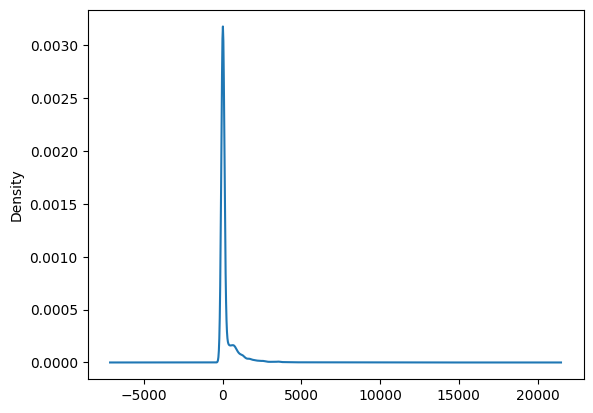

In [103]:
all_data['RoomService'].plot.density()

<Axes: ylabel='Density'>

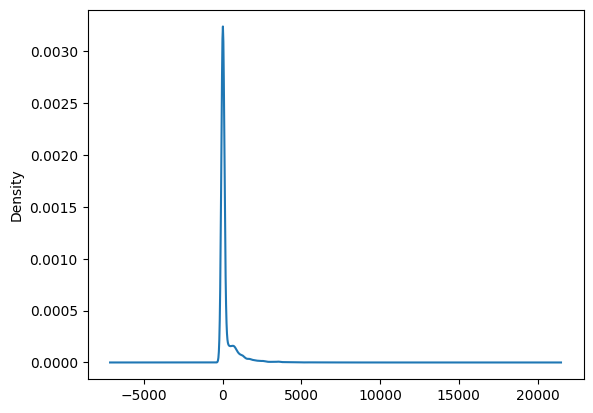

In [104]:
#由於分布不均，所以我們採用中位數填充方式
all_data['RoomService'] = all_data['RoomService'].fillna(all_data['RoomService'].median())
all_data['RoomService'].plot.density()

<font size =5>**Foodcourt特徵**</font>

<Axes: ylabel='Density'>

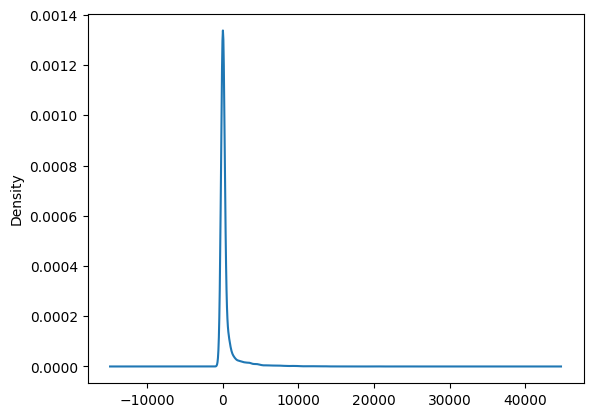

In [105]:
all_data['FoodCourt'].plot.density()

<Axes: ylabel='Density'>

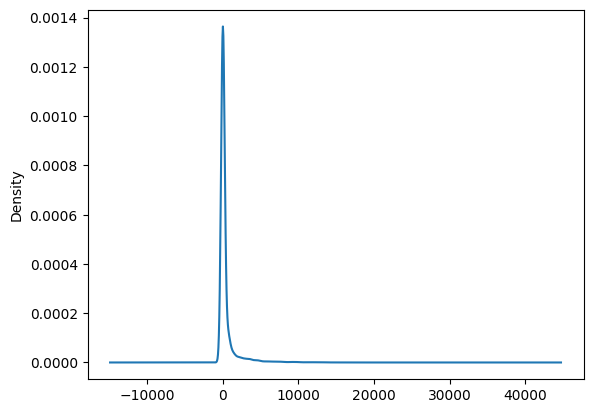

In [106]:
#由於分布不均，所以我們採用中位數填充方式
all_data['FoodCourt'] = all_data['FoodCourt'].fillna(all_data['FoodCourt'].median())
all_data['FoodCourt'].plot.density()

<font size =5>**ShoppingMall特徵**</font>

<Axes: ylabel='Density'>

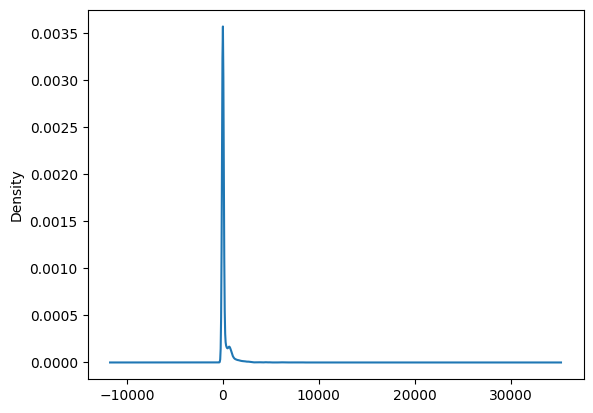

In [107]:
all_data['ShoppingMall'].plot.density()

In [108]:
#由於分布不均，所以我們採用中位數填充方式
all_data['ShoppingMall'] = all_data['ShoppingMall'].fillna(all_data['ShoppingMall'].median())


<font size =5>**Spa特徵**</font>

<Axes: ylabel='Density'>

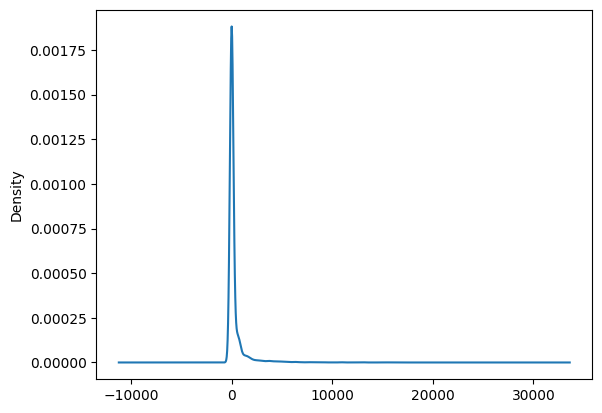

In [109]:
all_data['Spa'].plot.density()

In [110]:
#由於分布不均，所以我們採用中位數填充方式
all_data['Spa'] = all_data['Spa'].fillna(all_data['Spa'].median())

<font size =5>**VRDeck特徵**</font>

<Axes: ylabel='Density'>

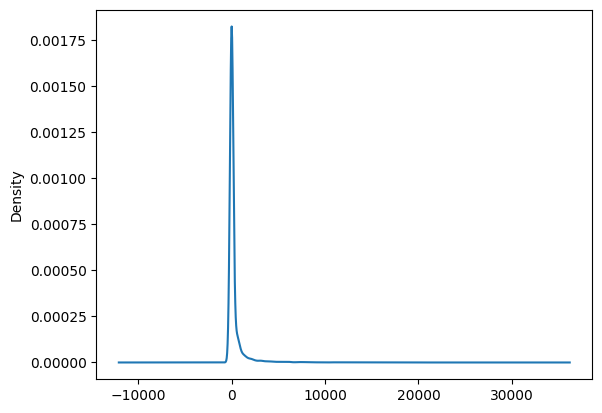

In [111]:
all_data['VRDeck'].plot.density()

In [112]:
#由於分布不均，所以我們採用中位數填充方式
all_data['VRDeck'] = all_data['VRDeck'].fillna(all_data['VRDeck'].median())

<font size =5>**檢查各項特徵是否有未填上的缺漏**</font>

In [113]:
all_data.isna().sum().sort_values(ascending=False)

Transported     4277
HomePlanet         0
CryoSleep          0
Destination        0
Age                0
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Deck               0
Side               0
dtype: int64

<font size =5 >**將所有特徵轉換為數據型**</font>

各項數據透過預處理後，我們需要將所有特徵都轉換為數據型

而需要轉換的有:HomePlanet、CryoSleep、Destination、VIP、Deck、Side

In [124]:
categorical_col = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

for col in categorical_col:
    all_data[col] = all_data[col].astype("category").cat.codes

all_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


<font size =5>**將合併後的數據拆回訓練及以及測試集**</font>

In [114]:
train_data.shape, test_data.shape, all_data.shape

((8693, 12), (4277, 11), (12970, 13))

In [125]:
train_data = all_data.iloc[:8693, :]
test_data = all_data.iloc[-4277:, :]
train_data.shape, test_data.shape

((8693, 13), (4277, 13))

In [126]:
train_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1


In [127]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
8693,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,NaN,6,1
8694,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,NaN,5,1
8695,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,NaN,2,1
8696,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,NaN,2,1
8697,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,NaN,5,1


In [128]:
test_data.drop(['Transported'], axis=1, inplace=True)

C:\Users\ivan9\AppData\Local\Temp\ipykernel_31612\2607354318.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['Transported'], axis=1, inplace=True)


In [129]:
test_data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
8693,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,6,1
8694,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,5,1
8695,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,2,1
8696,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,2,1
8697,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,5,1


<font size=5>**將訓練集中Transported的資料轉換為數字類型**</font>

In [130]:
train_data['Transported'] = train_data['Transported'].astype("category").cat.codes
train_data.head()

C:\Users\ivan9\AppData\Local\Temp\ipykernel_31612\1328202342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['Transported'] = train_data['Transported'].astype("category").cat.codes


,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1


In [131]:
train_data.corr()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Side
HomePlanet,1.000000,0.075635,0.034737,0.133879,0.123512,0.211751,0.071454,0.101383,0.055047,0.039824,0.115461,-0.408532,-0.001930
CryoSleep,0.075635,1.000000,-0.083844,-0.068497,-0.074954,-0.216689,-0.182029,-0.188532,-0.178382,-0.171721,0.404716,0.015995,0.010993
Destination,0.034737,-0.083844,1.000000,-0.006624,-0.044707,0.045733,-0.111057,0.024721,-0.055815,-0.073293,-0.108152,0.183707,-0.010752
Age,0.133879,-0.068497,-0.006624,1.000000,0.091583,0.068432,0.127345,0.032856,0.121068,0.099553,-0.074249,-0.241689,0.011258
VIP,0.123512,-0.074954,-0.044707,0.091583,1.000000,0.056566,0.125499,0.018412,0.060991,0.123061,-0.037261,-0.178205,-0.009500
RoomService,0.211751,-0.216689,0.045733,0.068432,0.056566,1.000000,-0.015126,0.052337,0.009244,-0.018624,-0.241124,-0.024327,-0.011749
FoodCourt,0.071454,-0.182029,-0.111057,0.127345,0.125499,-0.015126,1.000000,-0.013717,0.221468,0.224572,0.045583,-0.318038,0.021765
ShoppingMall,0.101383,-0.188532,0.024721,0.032856,0.018412,0.052337,-0.013717,1.000000,0.014542,-0.007849,0.009391,-0.033038,-0.020788
Spa,0.055047,-0.178382,-0.055815,0.121068,0.060991,0.009244,0.221468,0.014542,1.000000,0.147658,-0.218545,-0.219035,0.005348
VRDeck,0.039824,-0.171721,-0.073293,0.099553,0.123061,-0.018624,0.224572,-0.007849,0.147658,1.000000,-0.204874,-0.253101,-0.007322


In [132]:
x_train = train_data.drop('Transported', axis = 1)
x_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Deck,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,1,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,5,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,5,1


In [133]:
y_train = train_data[['Transported']]
y_train.head()

,Transported
0,0
1,1
2,0
3,0
4,1


In [134]:
x_train.shape, y_train.shape

((8693, 12), (8693, 1))

<font size =5>**從sklearn中選擇模型**</font>

In [135]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingClassifier

透過Scikit learn中Pipeline功能，讓我們可以把9個算法裝在1個pipeline裡，可以省去非常多重複的步驟

In [136]:
from sklearn.pipeline import Pipeline

pipeline_dt=Pipeline([('GaussianNB',GaussianNB())])
pipeline_knn=Pipeline([('KNeighborsClassifier',KNeighborsClassifier())])
pipeline_rf=Pipeline([ ('RandomForestClassifier',RandomForestClassifier())])
pipeline_dt=Pipeline([ ('DecisionTreeClassifier',DecisionTreeClassifier())])
pipeline_xgb=Pipeline([ ('XGBClassifier',XGBClassifier())])
pipeline_lgr=Pipeline([ ('LogisticRegression',LogisticRegression(solver='lbfgs', max_iter=3000))])
pipeline_lgbm=Pipeline([ ('LGBMClassifier',LGBMClassifier(objective='binary'))])
pipeline_catB=Pipeline([ ('CatBoostClassifier',CatBoostClassifier(verbose = 0 ))])
pipeline_adaB=Pipeline([ ('AdaBoostClassifier',GradientBoostingClassifier())])

pipelines = [pipeline_dt, pipeline_knn, pipeline_rf,pipeline_dt,pipeline_xgb , pipeline_lgr , pipeline_lgbm , pipeline_catB , pipeline_adaB]
pipe_dict = {0: 'GaussianNB', 1: 'KNeighborsClassifier', 2: 'RandomForestClassifier',
             3: 'DecisionTreeClassifier',4: 'XGBClassifier' , 5 : 'LogisticRegression' ,
             6 : 'LGBMClassifier' , 7 : 'CatBoostClassifier' ,8 : 'AdaBoostClassifier'}

透過scikit learn中交叉驗證函數來分別算出9個算法中的準確率，並挑選最高的當作我們採用的算法

In [137]:
from sklearn.metrics import accuracy_score
original_results = dict()
for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, x_train.values,y_train.values.ravel(), cv=3 ,scoring='accuracy').mean()
    original_results[pipe_dict[i]] = cv_score

In [138]:
for key , value in sorted(original_results.items(),key=lambda item : item[1]):
    print(key , value) 

DecisionTreeClassifier 0.7374894775053861
GaussianNB 0.7385251903419122
KNeighborsClassifier 0.770391008395841
LogisticRegression 0.7814338210625226
RandomForestClassifier 0.7848853898740588
AdaBoostClassifier 0.7906373163610786
LGBMClassifier 0.7951236054146111
XGBClassifier 0.7954687503846304
CatBoostClassifier 0.7985748565958978


選擇CatBoostClassifier作為我們的算法，並訓練模型以及預測結果

In [139]:
cat = CatBoostClassifier(eval_metric='Accuracy',
                        verbose = 0)
Module = cat.fit(x_train.values, y_train.values.ravel())
predictions = cat.predict(test_data.values)

In [140]:
sub = pd.DataFrame()
sub['PassengerId'] = pd.read_csv("spaceship-titanic/test.csv", usecols=['PassengerId'])
sub['Transported'] = predictions
sub.head()

,PassengerId,Transported
0,0013_01,1
1,0018_01,0
2,0019_01,1
3,0021_01,1
4,0023_01,1


In [141]:
sub.shape

(4277, 2)

In [142]:
sub['Transported'] = sub['Transported'].astype('bool')

In [143]:
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


In [95]:
sub.to_csv('submission.csv',index=False)

<font size=5>**上傳至Kaggle測試結果**</font>

In [110]:
%%HTML
<img src="score.JPG",width=320,height=240>

<font size = 5 >**可視化**</font>

推測HomePlanet CryoSleep VIP 是最有可能與Transported有相關性的

將HomePlanet CryoSleep VIP 分別與Transported做分布關係圖

HomePlanet
0    2054
1    1404
2     920
Name: Transported, dtype: int64
HomePlanet
0    0.469164
1    0.320694
2    0.210142
Name: Transported, dtype: float64


<Axes: xlabel='HomePlanet'>

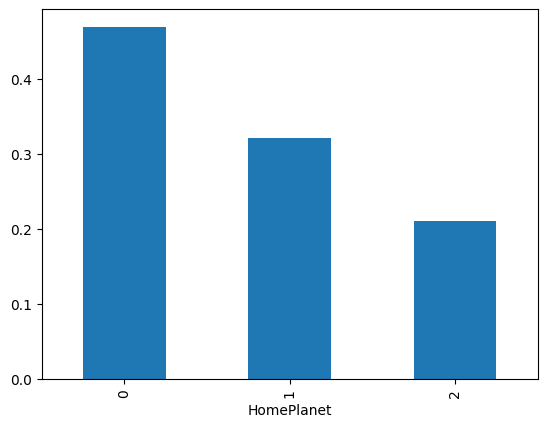

In [147]:
HP = train_data.groupby('HomePlanet').Transported.sum()
TS_HP = train_data.Transported.sum()
print(HP)
print(HP/TS_HP)
(HP/TS_HP).plot(kind='bar')

CryoSleep
0    1789
1    2483
2     106
Name: Transported, dtype: int64
4378
CryoSleep
0    0.408634
1    0.567154
2    0.024212
Name: Transported, dtype: float64


<Axes: xlabel='CryoSleep'>

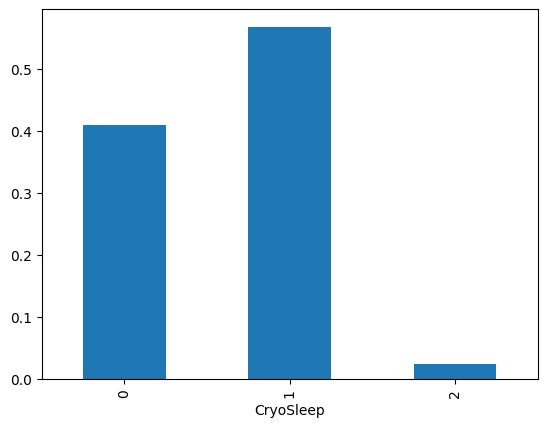

In [150]:
CS = train_data.groupby('CryoSleep').Transported.sum()
TS_CS = train_data.Transported.sum()
print(CS)
print(TS_CS)
print(CS/TS_CS)
(CS/TS_CS).plot(kind='bar')

VIP
0    4302
1      76
Name: Transported, dtype: int64
VIP
0    0.98264
1    0.01736
Name: Transported, dtype: float64


<Axes: xlabel='VIP'>

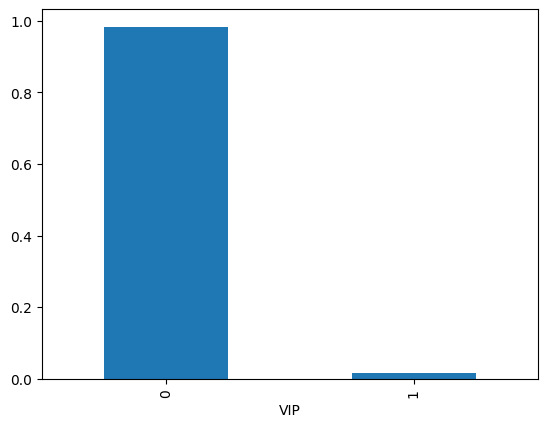

In [149]:
vip = train_data.groupby('VIP').Transported.sum()
TS_vip= train_data.Transported.sum()
print(vip)
print(vip/TS_vip)
(vip/TS_vip).plot(kind='bar')

<font size=5>**推測**</font>

由於一開始便將Name與Passenger_ID移除，不排除姓氏是相同的有可能為親朋好友，所以Name也有可能會影響到準確率。

目前從是否進入異空間來看VIP與transported有可能有著極大的相關，沒有VIP的傳入異空間的可能性極高

<font size=5>**參考資料**</font>

將非數字型態轉換為數字型態:https://zhuanlan.zhihu.com/p/618381979

其他人的做法:https://www.wpgdadatong.com/tw/blog/detail/70687

